In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression

In [2]:
Data=pd.read_csv("./data/Test.csv",encoding='utf-8')
Data=Data[Data['A']=='v']
Data=Data.filter(['State','Felony_sentence_aver','Misdemeanor_sentence_aver','Felony_sentence_sub','Misdemeanor_sentence_sub','GDP_penalty','Temper','GDP','Education','Happy','PCPI','Police_area','older_rate','MSA_Rate','Female_Rate','Traveler_spending','Misdemeanor_Result','Felony_Result','Gun_ownership'])
Data
print(len(Data))

30


In [3]:
Data['log_Misdemeanor']=np.log(Data['Misdemeanor_Result'])
Data['log_Felony']=np.log(Data['Felony_Result'])

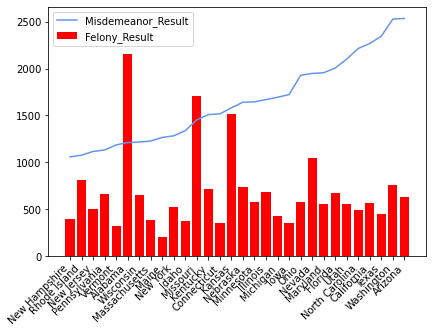

In [4]:
Data=Data.sort_values(by='Misdemeanor_Result')
#plt.figure(figsize=(14,14))
plt.plot(Data['State'], Data['Misdemeanor_Result'],color='cornflowerblue',label='Misdemeanor_Result')
plt.bar(Data['State'],Data['Felony_Result'],color='Red',label='Felony_Result')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.legend()
# plt.grid(True)
plt.show()

<Figure size 1008x1008 with 0 Axes>

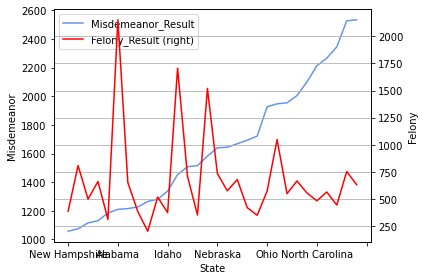

In [5]:
Data=Data.sort_values(by='Misdemeanor_Result')
plt.figure(figsize=(14,14))
ax=Data.plot(kind='line',x='State',y='Misdemeanor_Result',color='cornflowerblue')
ax2=Data.plot(kind='line', x='State', y='Felony_Result', secondary_y=True,color='Red', ax=ax)
ax.set_ylabel('Misdemeanor')
ax2.set_ylabel('Felony')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

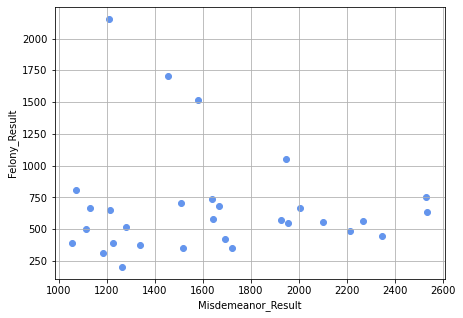

pearson correlation  =  -0.07199629308454522


In [6]:
plt.figure(figsize=(7,5))
x = 'Misdemeanor_Result'
y = 'Felony_Result'
plt.scatter(Data[x], Data[y], c='cornflowerblue')
plt.xlabel(x)
plt.ylabel(y)
plt.grid(True)
plt.show()
value1, value2 = stats.pearsonr(Data[x], Data[y])
print("pearson correlation  = ",value1)

In [7]:
def make_data(data, sub, fel, mis):
    sub_data=data.filter(['State',fel,mis,sub])
    sub_data=sub_data.sort_values(by=sub)
    sub_data=sub_data.reset_index()
    
    return sub_data

def make_grahp(data, sub, fel, mis):
    plt.plot(data[sub],data[fel],'x',label='Felony',color='red')
    plt.plot(data[sub],data[mis],'o',label='Misdemeanor',color='cornflowerblue')
    
    #for i,txt in enumerate(data['State']):
    #    plt.annotate(txt, (data[sub][i], data[fel][i]))
    #    plt.annotate(txt, (data[sub][i], data[mis][i]))
        
    Mis_linear=LinearRegression()
    Mis_linear.fit(data[sub].values.reshape(-1,1),data[mis])
    Mis_prediction=Mis_linear.predict(data[sub].values.reshape(-1,1))
    plt.plot(data[sub],Mis_linear.predict(data[sub].values.reshape(-1,1)),color='blue')

    Fel_linear=LinearRegression()
    Fel_linear.fit(data[sub].values.reshape(-1,1),data[fel])
    Fel_prediction=Fel_linear.predict(data[sub].values.reshape(-1,1))
    plt.plot(data[sub],Fel_linear.predict(data[sub].values.reshape(-1,1)),color='red', linestyle='dashdot')
    
    print("\nFelony 기울기 : ",Fel_linear.coef_)
    print("Felony 절편 : ",Fel_linear.intercept_)
    print("\nMisdemeanor 기울기 : ",Mis_linear.coef_)
    print("Misdemeanor 절편 : ",Mis_linear.intercept_)

def make_body(data,sub,crime):
    body=pd.DataFrame({crime:data[crime],sub:data[sub]})
    return body

In [8]:
def penalty_make_data(data, sub, fel, mis):
    sub_data=data.filter(['State',fel,mis,sub])
    sub_data=sub_data.sort_values(by=sub)
    sub_data=sub_data.reset_index()
    
    return sub_data

def penalty_make_grahp(data1, data2, sub1, sub2, fel, mis):
    plt.plot(data1[sub1],data1[fel],'x',label='Felony',color='red')
    plt.plot(data2[sub2],data2[mis],'o',label='Misdemeanor',color='cornflowerblue')
    
    #for i,txt in enumerate(data['State']):
    #    plt.annotate(txt, (data[sub][i], data[fel][i]))
    #    plt.annotate(txt, (data[sub][i], data[mis][i]))
        
    Mis_linear=LinearRegression(normalize=True)
    Mis_linear.fit(data2[sub2].values.reshape(-1,1),data2[mis])
    Mis_prediction=Mis_linear.predict(data2[sub2].values.reshape(-1,1))
    plt.plot(data2[sub2],Mis_linear.predict(data2[sub2].values.reshape(-1,1)),color='blue')

    Fel_linear=LinearRegression(normalize=True)
    Fel_linear.fit(data1[sub1].values.reshape(-1,1),data1[fel])
    Fel_prediction=Fel_linear.predict(data1[sub1].values.reshape(-1,1))
    plt.plot(data1[sub1],Fel_linear.predict(data1[sub1].values.reshape(-1,1)),color='red', linestyle='dashdot')
    
    print("\nFelony 기울기 : ",Fel_linear.coef_)
    print("Felony 절편 : ",Fel_linear.intercept_)
    print("\nMisdemeanor 기울기 : ",Mis_linear.coef_)
    print("Misdemeanor 절편 : ",Mis_linear.intercept_)

def make_body(data,sub,crime):
    body=pd.DataFrame({crime:data[crime],sub:data[sub]})
    return body


Felony 기울기 :  [-8.74877143e-05]
Felony 절편 :  727.3639733394208

Misdemeanor 기울기 :  [0.00025126]
Misdemeanor 절편 :  1502.5932650532484

Felony 기울기 :  [-0.03265097]
Felony 절편 :  1116.5481292746706

Misdemeanor 기울기 :  [-0.05980062]
Misdemeanor 절편 :  2448.765314570092

Felony 기울기 :  [-28.60789746]
Felony 절편 :  2221.951858389239

Misdemeanor 기울기 :  [8.64226913]
Misdemeanor 절편 :  1178.5975495878379

Felony 기울기 :  [-0.01542441]
Felony 절편 :  1544.217903787271

Misdemeanor 기울기 :  [-0.0087576]
Misdemeanor 절편 :  2137.05508631952

Felony 기울기 :  [-10.6656635]
Felony 절편 :  687.5302533300579

Misdemeanor 기울기 :  [333.3423111]
Misdemeanor 절편 :  1339.2739615328537

Felony 기울기 :  [-0.18735903]
Felony 절편 :  692.9564312129561

Misdemeanor 기울기 :  [9.58642127]
Misdemeanor 절편 :  866.7959235457695

Felony 기울기 :  [-17.19938117]
Felony 절편 :  970.1347131539621

Misdemeanor 기울기 :  [-100.93796592]
Misdemeanor 절편 :  3361.0382539611364

Felony 기울기 :  [76.59772944]
Felony 절편 :  -3204.2276946762086

Misdemeanor 기울기 :  

Text(0.5, 27.003125000000196, 'Gun_ownership')

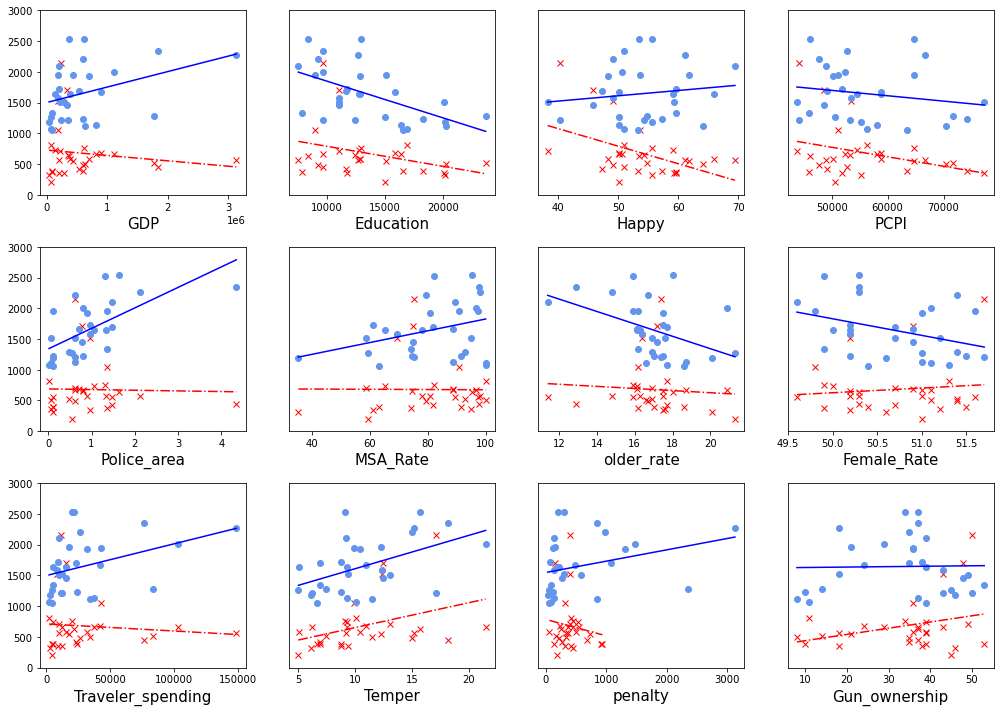

In [9]:
plt.figure(figsize=(14,10))

num=15

plt.subplot(3,4,1)
GDP_data=make_data(Data,'GDP','Felony_Result','Misdemeanor_Result')
make_grahp(GDP_data,'GDP','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
plt.xlabel('GDP', fontsize=num)

plt.subplot(3,4,2)
Education_data=make_data(Data,'Education','Felony_Result','Misdemeanor_Result')
make_grahp(Education_data,'Education','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('Education',fontsize=num)

plt.subplot(3,4,3)
Happy_data=make_data(Data,'Happy','Felony_Result','Misdemeanor_Result')
make_grahp(Happy_data,'Happy','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('Happy',fontsize=num)

plt.subplot(3,4,4)
PCPI_data=make_data(Data,'PCPI','Felony_Result','Misdemeanor_Result')
make_grahp(PCPI_data,'PCPI','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('PCPI',fontsize=num)

plt.subplot(3,4,5)
Police_area_data=make_data(Data,'Police_area','Felony_Result','Misdemeanor_Result')
make_grahp(Police_area_data,'Police_area','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
plt.xlabel('Police_area',fontsize=num)

plt.subplot(3,4,6)
MSA_Rate_data=make_data(Data,'MSA_Rate','Felony_Result','Misdemeanor_Result')
make_grahp(MSA_Rate_data,'MSA_Rate','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('MSA_Rate',fontsize=num)

plt.subplot(3,4,7)
older_rate_data=make_data(Data,'older_rate','Felony_Result','Misdemeanor_Result')
make_grahp(older_rate_data,'older_rate','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('older_rate',fontsize=num)

plt.subplot(3,4,8)
Female_Rate_data=make_data(Data,'Female_Rate','Felony_Result','Misdemeanor_Result')
make_grahp(Female_Rate_data,'Female_Rate','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('Female_Rate',fontsize=num)

plt.subplot(3,4,9)
Traveler_spending_data=make_data(Data,'Traveler_spending','Felony_Result','Misdemeanor_Result')
make_grahp(Traveler_spending_data,'Traveler_spending','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
plt.xlabel('Traveler_spending',fontsize=num)

plt.subplot(3,4,10)
Temper_data=make_data(Data,'Temper','Felony_Result','Misdemeanor_Result')
make_grahp(Temper_data,'Temper','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('Temper',fontsize=num)

plt.subplot(3,4,11)
fel_penalty_data=penalty_make_data(Data,'Felony_sentence_aver','Felony_Result','Misdemeanor_Result')
mis_penalty_data=penalty_make_data(Data,'GDP_penalty','Felony_Result','Misdemeanor_Result')
penalty_make_grahp(fel_penalty_data,mis_penalty_data,'Felony_sentence_aver','GDP_penalty','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('penalty',fontsize=num)

plt.subplot(3,4,12)
Temper_data=make_data(Data,'Gun_ownership','Felony_Result','Misdemeanor_Result')
make_grahp(Temper_data,'Gun_ownership','Felony_Result','Misdemeanor_Result')
#plt.grid(True)
plt.tight_layout()
plt.ylim([0, 3000])
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('Gun_ownership',fontsize=num)

# GDP


Felony 기울기 :  [-8.74877143e-05]
Felony 절편 :  727.3639733394208

Misdemeanor 기울기 :  [0.00025126]
Misdemeanor 절편 :  1502.5932650532484

Felony 기울기 :  [-14.78031435]
Felony 절편 :  865.8525849625237

Misdemeanor 기울기 :  [189.47738403]
Misdemeanor 절편 :  -766.3639225425643

Felony 기울기 :  [-3.81209574e-08]
Felony 절편 :  6.4060386605736275

Misdemeanor 기울기 :  [1.44004245e-07]
Misdemeanor 절편 :  7.2888306605208895

Felony 기울기 :  [0.04487269]
Felony 절편 :  5.813328736406441

Misdemeanor 기울기 :  [0.11299348]
Misdemeanor 절편 :  5.9324478897422


Text(0.5, 0, 'GDP')

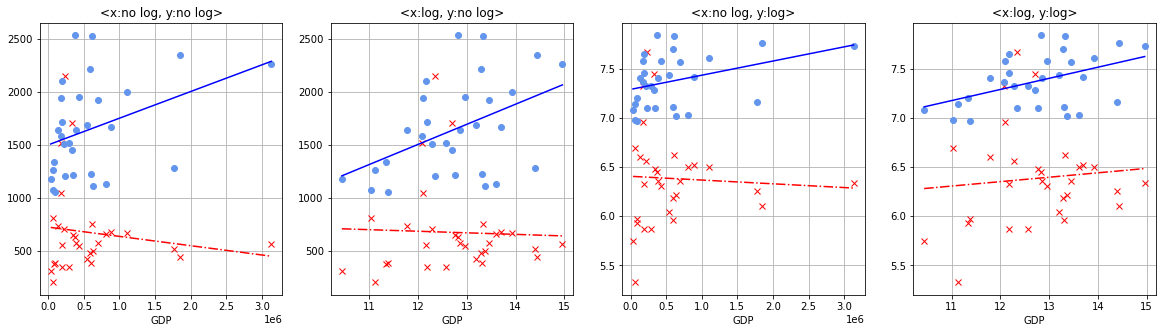

In [10]:
plt.figure(figsize=(20,5))
Data['log_GDP']=np.log(Data['GDP'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
GDP_data=make_data(Data,'GDP','Felony_Result','Misdemeanor_Result')
make_grahp(GDP_data,'GDP','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('GDP')

plt.subplot(142)
plt.title('<x:log, y:no log>')
GDP_data=make_data(Data,'log_GDP','Felony_Result','Misdemeanor_Result')
make_grahp(GDP_data,'log_GDP','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('GDP')

plt.subplot(143)
plt.title('<x:no log, y:log>')
GDP_data=make_data(Data,'GDP','log_Felony','log_Misdemeanor')
make_grahp(GDP_data,'GDP','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('GDP')

plt.subplot(144)
plt.title('<x:log, y:log>')
GDP_data=make_data(Data,'log_GDP','log_Felony','log_Misdemeanor')
make_grahp(GDP_data,'log_GDP','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('GDP')

In [11]:
import statsmodels.api as sm
mis_model_GDP = sm.OLS(Data['Misdemeanor_Result'],(Data['GDP']))
mis_result_GDP = mis_model_GDP.fit()
print(mis_result_GDP.summary())
fel_model_GDP = sm.OLS(Data['Felony_Result'],(Data['GDP']))
fel_result_GDP = fel_model_GDP.fit()
print(fel_result_GDP.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.500
Model:                            OLS   Adj. R-squared (uncentered):              0.483
Method:                 Least Squares   F-statistic:                              29.04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    8.62e-06
Time:                        11:18:33   Log-Likelihood:                         -255.36
No. Observations:                  30   AIC:                                      512.7
Df Residuals:                      29   BIC:                                      514.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
fel_GDP=make_body(Data,'GDP','Felony_Result')
mis_GDP=make_body(Data,'GDP','Misdemeanor_Result')
fel_log_GDP=make_body(Data,'log_GDP','Felony_Result')
mis_log_GDP=make_body(Data,'log_GDP','Misdemeanor_Result')
log_fel_GDP=make_body(Data,'GDP','log_Felony')
log_mis_GDP=make_body(Data,'GDP','log_Misdemeanor')
log_fel_log_GDP=make_body(Data,'log_GDP','log_Felony')
log_mis_log_GDP=make_body(Data,'log_GDP','log_Misdemeanor')

In [13]:
fel_GDP_spear=stats.spearmanr(fel_GDP.GDP,fel_GDP.Felony_Result)
mis_GDP_spear=stats.spearmanr(mis_GDP.GDP,mis_GDP.Misdemeanor_Result)
print('fel: {}'.format(fel_GDP_spear))
print('mis: {}'.format(mis_GDP_spear))

fel: SpearmanrResult(correlation=0.059844271412680755, pvalue=0.7534190208543121)
mis: SpearmanrResult(correlation=0.40511679644048937, pvalue=0.02636271851016558)


In [14]:
fel_GDP_pear=stats.pearsonr(fel_GDP.GDP,fel_GDP.Felony_Result)
mis_GDP_pear=stats.pearsonr(mis_GDP.GDP,mis_GDP.Misdemeanor_Result)
print('fel: {}'.format(fel_GDP_pear))
print('mis: {}'.format(mis_GDP_pear))

fel: (-0.13662398921031554, 0.471580667379813)
mis: (0.37128097437220126, 0.043379775262049)


In [68]:
import scipy.stats as stats
#fel_GDP_pearson=fel_GDP.corr(method='pearson')
fel_GDP_pearson=stats.pearsonr(Data['GDP'],Data['Felony_Result'])
mis_GDP_pearson=stats.pearsonr(Data['GDP'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_GDP_pearson)
print(mis_GDP_pearson)

fel_log_GDP_pearson=stats.pearsonr(Data['log_GDP'],Data['Felony_Result'])
mis_log_GDP_pearson=stats.pearsonr(Data['log_GDP'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_GDP_pearson)
print(mis_log_GDP_pearson)

log_fel_GDP_pearson=stats.pearsonr(Data['GDP'],Data['log_Felony'])
log_mis_GDP_pearson=stats.pearsonr(Data['GDP'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_GDP_pearson)
print(log_mis_GDP_pearson)

log_fel_log_GDP_pearson=stats.pearsonr(Data['log_GDP'],Data['log_Felony'])
log_mis_log_GDP_pearson=stats.pearsonr(Data['log_GDP'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_GDP_pearson)
print(log_mis_log_GDP_pearson)


=======x:no log, y:no log========
(-0.13662398921031554, 0.471580667379813)
(0.37128097437220126, 0.043379775262049)

=======x:log, y:no log========
(-0.037313860323335, 0.8447979666585038)
(0.45263882961958, 0.01201939714504044)

=======x:no log, y:log========
(-0.05064518759800325, 0.7904097202281161)
(0.35474591396778005, 0.05441127609835388)

=======x:log, y:log========
(0.09637472416256382, 0.6124227327601895)
(0.44998920937902775, 0.01259345481318181)


# Education


Felony 기울기 :  [-0.03265097]
Felony 절편 :  1116.5481292746706

Misdemeanor 기울기 :  [-0.05980062]
Misdemeanor 절편 :  2448.765314570092

Felony 기울기 :  [-423.76359341]
Felony 절편 :  4686.960125322399

Misdemeanor 기울기 :  [-820.67353748]
Misdemeanor 절편 :  9409.461030915976

Felony 기울기 :  [-4.14652489e-05]
Felony 절편 :  6.941678096643028

Misdemeanor 기울기 :  [-3.69385825e-05]
Misdemeanor 절편 :  7.866927801947059

Felony 기울기 :  [-0.53685355]
Felony 절편 :  11.463573921489012

Misdemeanor 기울기 :  [-0.50480621]
Misdemeanor 절편 :  12.146459522901978


Text(0.5, 0, 'Education')

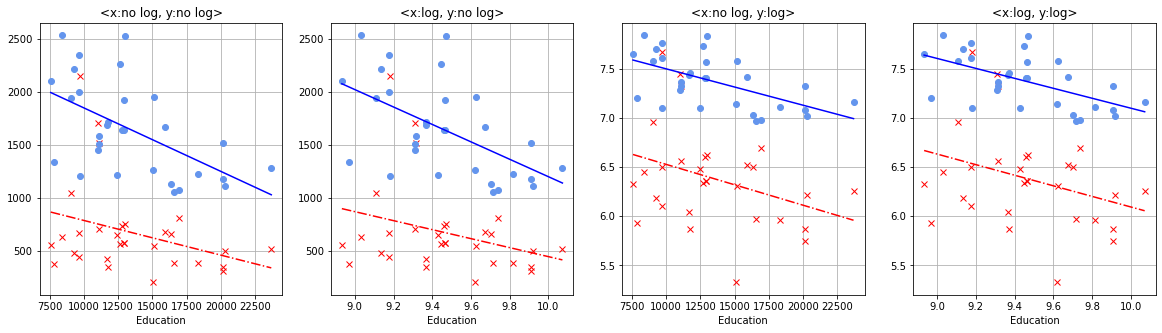

In [69]:
plt.figure(figsize=(20,5))
Data['log_Education']=np.log(Data['Education'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
Education_data=make_data(Data,'Education','Felony_Result','Misdemeanor_Result')
make_grahp(Education_data,'Education','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Education')

plt.subplot(142)
plt.title('<x:log, y:no log>')
Education_data=make_data(Data,'log_Education','Felony_Result','Misdemeanor_Result')
make_grahp(Education_data,'log_Education','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Education')

plt.subplot(143)
plt.title('<x:no log, y:log>')
Education_data=make_data(Data,'Education','log_Felony','log_Misdemeanor')
make_grahp(Education_data,'Education','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Education')

plt.subplot(144)
plt.title('<x:log, y:log>')
Education_data=make_data(Data,'log_Education','log_Felony','log_Misdemeanor')
make_grahp(Education_data,'log_Education','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Education')

In [70]:
mis_model_Education = sm.OLS(Data['Misdemeanor_Result'],(Data['Education']))
mis_result_Education = mis_model_Education.fit()
print(mis_result_Education.summary())
fel_model_Education = sm.OLS(Data['Felony_Result'],(Data['Education']))
fel_result_Education = fel_model_Education.fit()
print(fel_result_Education.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              101.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    5.57e-11
Time:                        11:19:35   Log-Likelihood:                         -243.21
No. Observations:                  30   AIC:                                      488.4
Df Residuals:                      29   BIC:                                      489.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
fel_Education=make_body(Data,'Education','Felony_Result')
mis_Education=make_body(Data,'Education','Misdemeanor_Result')
fel_log_Education=make_body(Data,'log_Education','Felony_Result')
mis_log_Education=make_body(Data,'log_Education','Misdemeanor_Result')
log_fel_Education=make_body(Data,'Education','log_Felony')
log_mis_Education=make_body(Data,'Education','log_Misdemeanor')
log_fel_log_Education=make_body(Data,'log_Education','log_Felony')
log_mis_log_Education=make_body(Data,'log_Education','log_Misdemeanor')

In [72]:
fel_Education_spear=stats.spearmanr(fel_Education.Education,fel_Education.Felony_Result)
mis_Education_spear=stats.spearmanr(mis_Education.Education,mis_Education.Misdemeanor_Result)
print('fel: {}'.format(fel_Education_spear))
print('mis: {}'.format(mis_Education_spear))

fel: SpearmanrResult(correlation=-0.27875417130144603, pvalue=0.13578511553789813)
mis: SpearmanrResult(correlation=-0.5617352614015573, pvalue=0.0012372342685145242)


In [73]:
fel_Education_spear=stats.pearsonr(fel_Education.Education,fel_Education.Felony_Result)
mis_Education_spear=stats.pearsonr(mis_Education.Education,mis_Education.Misdemeanor_Result)
print('fel: {}'.format(fel_Education_spear))
print('mis: {}'.format(mis_Education_spear))

fel: (-0.3216943670333703, 0.0829992962848531)
mis: (-0.5575206854835206, 0.0013707236595447614)


In [74]:
fel_Education_pearson=stats.pearsonr(Data['Education'],Data['Felony_Result'])
mis_Education_pearson=stats.pearsonr(Data['Education'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_Education_pearson)
print(mis_Education_pearson)

fel_log_Education_pearson=stats.pearsonr(Data['log_Education'],Data['Felony_Result'])
mis_log_Education_pearson=stats.pearsonr(Data['log_Education'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_Education_pearson)
print(mis_log_Education_pearson)

log_fel_Education_pearson=stats.pearsonr(Data['Education'],Data['log_Felony'])
log_mis_Education_pearson=stats.pearsonr(Data['Education'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_Education_pearson)
print(log_mis_Education_pearson)

log_fel_log_Education_pearson=stats.pearsonr(Data['log_Education'],Data['log_Felony'])
log_mis_log_Education_pearson=stats.pearsonr(Data['log_Education'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_Education_pearson)
print(log_mis_log_Education_pearson)


=======x:no log, y:no log========
(-0.3216943670333703, 0.0829992962848531)
(-0.5575206854835206, 0.0013707236595447614)

=======x:log, y:no log========
(-0.30394804760420846, 0.102479479106867)
(-0.5569985463338897, 0.0013881041656053973)

=======x:no log, y:log========
(-0.34755709533883433, 0.059848550345215426)
(-0.5741030183740728, 0.0009086909765700896)

=======x:log, y:log========
(-0.3275865291835822, 0.07720260612000963)
(-0.5711663616734902, 0.00097885470138987)


# Happy


Felony 기울기 :  [-28.60789746]
Felony 절편 :  2221.951858389239

Misdemeanor 기울기 :  [8.64226913]
Misdemeanor 절편 :  1178.5975495878379

Felony 기울기 :  [-1585.83015077]
Felony 절편 :  6989.684632263678

Misdemeanor 기울기 :  [467.99903289]
Misdemeanor 절편 :  -217.64229811149767

Felony 기울기 :  [-0.02850602]
Felony 절편 :  7.923125756154417

Misdemeanor 기울기 :  [0.0050741]
Misdemeanor 절편 :  7.0966114849134865

Felony 기울기 :  [-1.58725015]
Felony 절편 :  12.702009606085904

Misdemeanor 기울기 :  [0.26937801]
Misdemeanor 절편 :  6.298321358892306


Text(0.5, 0, 'Happy')

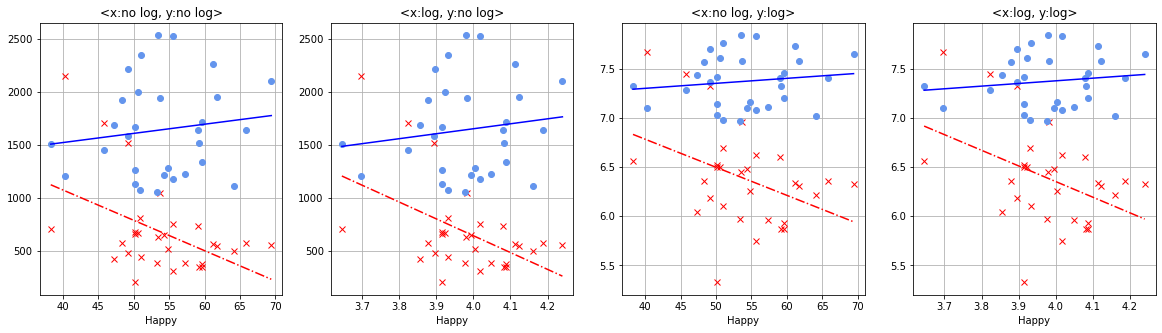

In [75]:
plt.figure(figsize=(20,5))
Data['log_Happy']=np.log(Data['Happy'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
Happy_data=make_data(Data,'Happy','Felony_Result','Misdemeanor_Result')
make_grahp(Happy_data,'Happy','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Happy')

plt.subplot(142)
plt.title('<x:log, y:no log>')
Happy_data=make_data(Data,'log_Happy','Felony_Result','Misdemeanor_Result')
make_grahp(Happy_data,'log_Happy','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Happy')

plt.subplot(143)
plt.title('<x:no log, y:log>')
Happy_data=make_data(Data,'Happy','log_Felony','log_Misdemeanor')
make_grahp(Happy_data,'Happy','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Happy')

plt.subplot(144)
plt.title('<x:log, y:log>')
Happy_data=make_data(Data,'log_Happy','log_Felony','log_Misdemeanor')
make_grahp(Happy_data,'log_Happy','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Happy')

In [76]:
fel_Happy=make_body(Data,'Happy','Felony_Result')
mis_Happy=make_body(Data,'Happy','Misdemeanor_Result')
fel_log_Happy=make_body(Data,'log_Happy','Felony_Result')
mis_log_Happy=make_body(Data,'log_Happy','Misdemeanor_Result')
log_fel_Happy=make_body(Data,'Happy','log_Felony')
log_mis_Happy=make_body(Data,'Happy','log_Misdemeanor')
log_fel_log_Happy=make_body(Data,'log_Happy','log_Felony')
log_mis_log_Happy=make_body(Data,'log_Happy','log_Misdemeanor')

In [77]:
fel_Happy_spear=stats.spearmanr(fel_Happy.Happy,fel_Happy.Felony_Result)
mis_Happy_spear=stats.spearmanr(mis_Happy.Happy,mis_Happy.Misdemeanor_Result)
print('fel: {}'.format(fel_Happy_spear))
print('mis: {}'.format(mis_Happy_spear))

fel: SpearmanrResult(correlation=-0.37441601779755285, pvalue=0.04150548297781971)
mis: SpearmanrResult(correlation=0.1239154616240267, pvalue=0.5141463019358128)


In [78]:
fel_Happy_spear=stats.pearsonr(fel_Happy.Happy,fel_Happy.Felony_Result)
mis_Happy_spear=stats.pearsonr(mis_Happy.Happy,mis_Happy.Misdemeanor_Result)
print('fel: {}'.format(fel_Happy_spear))
print('mis: {}'.format(mis_Happy_spear))

fel: (-0.4737873523462034, 0.00817496848628581)
mis: (0.1354357214864248, 0.4754810430986804)


In [79]:
fel_Happy_pearson=stats.pearsonr(Data['Happy'],Data['Felony_Result'])
mis_Happy_pearson=stats.pearsonr(Data['Happy'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_Happy_pearson)
print(mis_Happy_pearson)

fel_log_Happy_pearson=stats.pearsonr(Data['log_Happy'],Data['Felony_Result'])
mis_log_Happy_pearson=stats.pearsonr(Data['log_Happy'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_Happy_pearson)
print(mis_log_Happy_pearson)

log_fel_Happy_pearson=stats.pearsonr(Data['Happy'],Data['log_Felony'])
log_mis_Happy_pearson=stats.pearsonr(Data['Happy'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_Happy_pearson)
print(log_mis_Happy_pearson)

log_fel_log_Happy_pearson=stats.pearsonr(Data['log_Happy'],Data['log_Felony'])
log_mis_log_Happy_pearson=stats.pearsonr(Data['log_Happy'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_Happy_pearson)
print(log_mis_log_Happy_pearson)


=======x:no log, y:no log========
(-0.4737873523462034, 0.00817496848628581)
(0.1354357214864248, 0.4754810430986804)

=======x:log, y:no log========
(-0.4971913969819005, 0.005186028417804901)
(0.13884166295930342, 0.4643462009770543)

=======x:no log, y:log========
(-0.4016322677093527, 0.02781212847480965)
(0.13256184389749412, 0.4849829877666399)

=======x:log, y:log========
(-0.4233570579849034, 0.01974669451642796)
(0.13322670550662027, 0.48277614154163423)


In [80]:
import statsmodels.api as sm
mis_model_Happy = sm.OLS(Data['Misdemeanor_Result'],(Data['Happy']))
mis_result_Happy = mis_model_Happy.fit()
print(mis_result_Happy.summary())
fel_model_Happy = sm.OLS(Data['Felony_Result'],(Data['Happy']))
fel_result_Happy = fel_model_Happy.fit()
print(fel_result_Happy.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              367.1
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    5.24e-18
Time:                        11:21:16   Log-Likelihood:                         -226.56
No. Observations:                  30   AIC:                                      455.1
Df Residuals:                      29   BIC:                                      456.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# PCPI


Felony 기울기 :  [-0.01542441]
Felony 절편 :  1544.217903787271

Misdemeanor 기울기 :  [-0.0087576]
Misdemeanor 절편 :  2137.05508631952

Felony 기울기 :  [-924.6857964]
Felony 절편 :  10779.077250848926

Misdemeanor 기울기 :  [-494.17599781]
Misdemeanor 절편 :  7043.505838520298

Felony 기울기 :  [-1.58321724e-05]
Felony 절편 :  7.273797469012524

Misdemeanor 기울기 :  [-5.81304352e-06]
Misdemeanor 절편 :  7.69705304307484

Felony 기울기 :  [-0.92713655]
Felony 절편 :  16.512522519392576

Misdemeanor 기울기 :  [-0.33029162]
Misdemeanor 절편 :  10.978631413210149


Text(0.5, 0, 'PCPI')

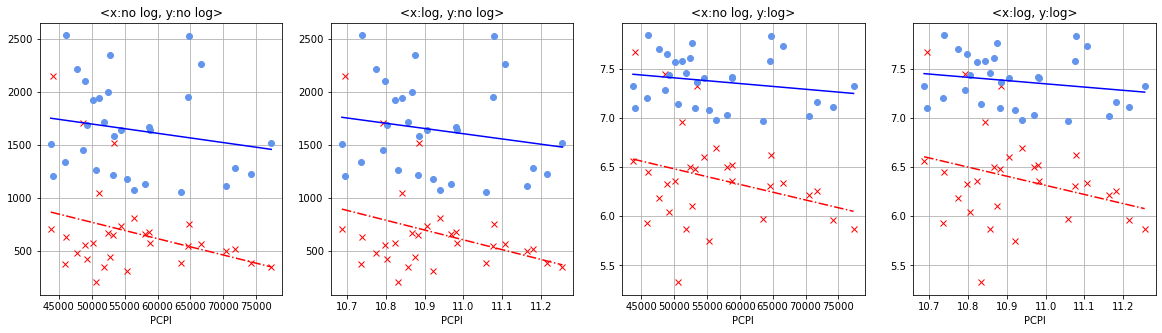

In [81]:
plt.figure(figsize=(20,5))
Data['log_PCPI']=np.log(Data['PCPI'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
PCPI_data=make_data(Data,'PCPI','Felony_Result','Misdemeanor_Result')
make_grahp(PCPI_data,'PCPI','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('PCPI')

plt.subplot(142)
plt.title('<x:log, y:no log>')
PCPI_data=make_data(Data,'log_PCPI','Felony_Result','Misdemeanor_Result')
make_grahp(PCPI_data,'log_PCPI','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('PCPI')

plt.subplot(143)
plt.title('<x:no log, y:log>')
PCPI_data=make_data(Data,'PCPI','log_Felony','log_Misdemeanor')
make_grahp(PCPI_data,'PCPI','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('PCPI')

plt.subplot(144)
plt.title('<x:log, y:log>')
PCPI_data=make_data(Data,'log_PCPI','log_Felony','log_Misdemeanor')
make_grahp(PCPI_data,'log_PCPI','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('PCPI')

In [82]:
fel_PCPI=make_body(Data,'PCPI','Felony_Result')
mis_PCPI=make_body(Data,'PCPI','Misdemeanor_Result')
fel_log_PCPI=make_body(Data,'log_PCPI','Felony_Result')
mis_log_PCPI=make_body(Data,'log_PCPI','Misdemeanor_Result')
log_fel_PCPI=make_body(Data,'PCPI','log_Felony')
log_mis_PCPI=make_body(Data,'PCPI','log_Misdemeanor')
log_fel_log_PCPI=make_body(Data,'log_PCPI','log_Felony')
log_mis_log_PCPI=make_body(Data,'log_PCPI','log_Misdemeanor')

In [83]:
fel_PCPI_spear=stats.spearmanr(fel_PCPI.PCPI,fel_PCPI.Felony_Result)
mis_PCPI_spear=stats.spearmanr(mis_PCPI.PCPI,mis_PCPI.Misdemeanor_Result)
print('fel: {}'.format(fel_PCPI_spear))
print('mis: {}'.format(mis_PCPI_spear))

fel: SpearmanrResult(correlation=-0.19733036707452725, pvalue=0.2959218602301394)
mis: SpearmanrResult(correlation=-0.19733036707452725, pvalue=0.2959218602301394)


In [84]:
fel_PCPI_spear=stats.pearsonr(fel_PCPI.PCPI,fel_PCPI.Felony_Result)
mis_PCPI_spear=stats.pearsonr(mis_PCPI.PCPI,mis_PCPI.Misdemeanor_Result)
print('fel: {}'.format(fel_PCPI_spear))
print('mis: {}'.format(mis_PCPI_spear))

fel: (-0.33342501429942695, 0.07177130061147188)
mis: (-0.17913605572220592, 0.3435525985552202)


In [85]:
fel_PCPI_pearson=stats.pearsonr(Data['PCPI'],Data['Felony_Result'])
mis_PCPI_pearson=stats.pearsonr(Data['PCPI'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_PCPI_pearson)
print(mis_PCPI_pearson)

fel_log_PCPI_pearson=stats.pearsonr(Data['log_PCPI'],Data['Felony_Result'])
mis_log_PCPI_pearson=stats.pearsonr(Data['log_PCPI'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_PCPI_pearson)
print(mis_log_PCPI_pearson)

log_fel_PCPI_pearson=stats.pearsonr(Data['PCPI'],Data['log_Felony'])
log_mis_PCPI_pearson=stats.pearsonr(Data['PCPI'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_PCPI_pearson)
print(log_mis_PCPI_pearson)

log_fel_log_PCPI_pearson=stats.pearsonr(Data['log_PCPI'],Data['log_Felony'])
log_mis_log_PCPI_pearson=stats.pearsonr(Data['log_PCPI'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_PCPI_pearson)
print(log_mis_log_PCPI_pearson)


=======x:no log, y:no log========
(-0.33342501429942695, 0.07177130061147188)
(-0.17913605572220592, 0.3435525985552202)

=======x:log, y:no log========
(-0.3421985333942362, 0.06417161412168138)
(-0.17305076419246135, 0.36045999743971113)

=======x:no log, y:log========
(-0.2911553301162294, 0.11852393603110307)
(-0.19822367865270826, 0.29369665950186447)

=======x:log, y:log========
(-0.29189197324794797, 0.11755239729582596)
(-0.19281629058613736, 0.3073288753387405)


In [86]:
import statsmodels.api as sm
mis_model_PCPI = sm.OLS(Data['Misdemeanor_Result'],(Data['PCPI']))
mis_result_PCPI = mis_model_PCPI.fit()
print(mis_result_PCPI.summary())
fel_model_PCPI = sm.OLS(Data['Felony_Result'],(Data['PCPI']))
fel_result_PCPI = fel_model_PCPI.fit()
print(fel_result_PCPI.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              249.8
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    8.66e-16
Time:                        11:23:03   Log-Likelihood:                         -231.82
No. Observations:                  30   AIC:                                      465.6
Df Residuals:                      29   BIC:                                      467.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# area_police


Felony 기울기 :  [-10.6656635]
Felony 절편 :  687.5302533300579

Misdemeanor 기울기 :  [333.3423111]
Misdemeanor 절편 :  1339.2739615328537

Felony 기울기 :  [46.16346719]
Felony 절편 :  705.1432427248038

Misdemeanor 기울기 :  [217.54211457]
Misdemeanor 절편 :  1774.2040388180103

Felony 기울기 :  [0.01859996]
Felony 절편 :  6.367354125081496

Misdemeanor 기울기 :  [0.19747225]
Misdemeanor 절편 :  7.189335465909621

Felony 기울기 :  [0.07031692]
Felony 절편 :  6.426151404039147

Misdemeanor 기울기 :  [0.13605241]
Misdemeanor 절편 :  7.451249885709467


Text(0.5, 0, 'Police_area')

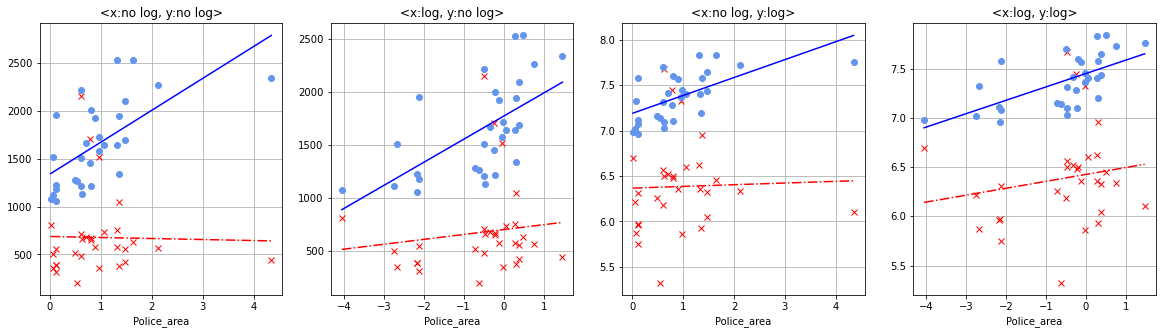

In [87]:
plt.figure(figsize=(20,5))
Data['log_Police_area']=np.log(Data['Police_area'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
Police_area_data=make_data(Data,'Police_area','Felony_Result','Misdemeanor_Result')
make_grahp(Police_area_data,'Police_area','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Police_area')

plt.subplot(142)
plt.title('<x:log, y:no log>')
Police_area_data=make_data(Data,'log_Police_area','Felony_Result','Misdemeanor_Result')
make_grahp(Police_area_data,'log_Police_area','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Police_area')

plt.subplot(143)
plt.title('<x:no log, y:log>')
Police_area_data=make_data(Data,'Police_area','log_Felony','log_Misdemeanor')
make_grahp(Police_area_data,'Police_area','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Police_area')

plt.subplot(144)
plt.title('<x:log, y:log>')
Police_area_data=make_data(Data,'log_Police_area','log_Felony','log_Misdemeanor')
make_grahp(Police_area_data,'log_Police_area','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Police_area')

In [88]:
fel_Police_area=make_body(Data,'Police_area','Felony_Result')
mis_Police_area=make_body(Data,'Police_area','Misdemeanor_Result')
fel_log_Police_area=make_body(Data,'log_Police_area','Felony_Result')
mis_log_Police_area=make_body(Data,'log_Police_area','Misdemeanor_Result')
log_fel_Police_area=make_body(Data,'Police_area','log_Felony')
log_mis_Police_area=make_body(Data,'Police_area','log_Misdemeanor')
log_fel_log_Police_area=make_body(Data,'log_Police_area','log_Felony')
log_mis_log_Police_area=make_body(Data,'log_Police_area','log_Misdemeanor')

In [33]:
fel_Police_area_spear=stats.spearmanr(fel_Police_area.Police_area,fel_Police_area.Felony_Result)
mis_Police_area_spear=stats.spearmanr(mis_Police_area.Police_area,mis_Police_area.Misdemeanor_Result)
print('fel: {}'.format(fel_Police_area_spear))
print('mis: {}'.format(mis_Police_area_spear))

fel: SpearmanrResult(correlation=0.1804226918798665, pvalue=0.3400401726309277)
mis: SpearmanrResult(correlation=0.7023359288097887, pvalue=1.5167164092987876e-05)


In [89]:
fel_Police_area_spear=stats.pearsonr(fel_Police_area.Police_area,fel_Police_area.Felony_Result)
mis_Police_area_spear=stats.pearsonr(mis_Police_area.Police_area,mis_Police_area.Misdemeanor_Result)
print('fel: {}'.format(fel_Police_area_spear))
print('mis: {}'.format(mis_Police_area_spear))

fel: (-0.021270464952858413, 0.9111682221658964)
mis: (0.6290533275835015, 0.0001964736177247461)


In [90]:
fel_Police_area_pearson=stats.pearsonr(Data['Police_area'],Data['Felony_Result'])
mis_Police_area_pearson=stats.pearsonr(Data['Police_area'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_Police_area_pearson)
print(mis_Police_area_pearson)

fel_log_Police_area_pearson=stats.pearsonr(Data['log_Police_area'],Data['Felony_Result'])
mis_log_Police_area_pearson=stats.pearsonr(Data['log_Police_area'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_Police_area_pearson)
print(mis_log_Police_area_pearson)

log_fel_Police_area_pearson=stats.pearsonr(Data['Police_area'],Data['log_Felony'])
log_mis_Police_area_pearson=stats.pearsonr(Data['Police_area'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_Police_area_pearson)
print(log_mis_Police_area_pearson)

log_fel_log_Police_area_pearson=stats.pearsonr(Data['log_Police_area'],Data['log_Felony'])
log_mis_log_Police_area_pearson=stats.pearsonr(Data['log_Police_area'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_Police_area_pearson)
print(log_mis_log_Police_area_pearson)


=======x:no log, y:no log========
(-0.021270464952858413, 0.9111682221658964)
(0.6290533275835015, 0.0001964736177247461)

=======x:log, y:no log========
(0.13540821894905963, 0.47557151513970675)
(0.6038066170266668, 0.00041108891510567347)

=======x:no log, y:log========
(0.03155699584779424, 0.8685179468566978)
(0.6212371035689708, 0.0002486094314690243)

=======x:log, y:log========
(0.17546922291038425, 0.35368235066896014)
(0.6295280212328045, 0.00019364564407420084)


In [91]:
import statsmodels.api as sm
mis_model_Police_area = sm.OLS(Data['Misdemeanor_Result'],(Data['Police_area']))
mis_result_Police_area = mis_model_Police_area.fit()
print(mis_result_Police_area.summary())
fel_model_Police_area = sm.OLS(Data['Felony_Result'],(Data['Police_area']))
fel_result_Police_area = fel_model_Police_area.fit()
print(fel_result_Police_area.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                              61.96
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    1.11e-08
Time:                        11:24:09   Log-Likelihood:                         -248.62
No. Observations:                  30   AIC:                                      499.2
Df Residuals:                      29   BIC:                                      500.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# MSA


Felony 기울기 :  [-0.18735903]
Felony 절편 :  692.9564312129561

Misdemeanor 기울기 :  [9.58642127]
Misdemeanor 절편 :  866.7959235457695

Felony 기울기 :  [81.3920965]
Felony 절편 :  321.6556992353399

Misdemeanor 기울기 :  [669.98876666]
Misdemeanor 절편 :  -1286.1007102163537

Felony 기울기 :  [0.0046686]
Felony 절편 :  6.005386301307537

Misdemeanor 기울기 :  [0.00535182]
Misdemeanor 절편 :  6.936002066273555

Felony 기울기 :  [0.42922123]
Felony 절편 :  4.50658011773688

Misdemeanor 기울기 :  [0.38145936]
Misdemeanor 절편 :  5.701622280854944


Text(0.5, 0, 'MSA_Rate')

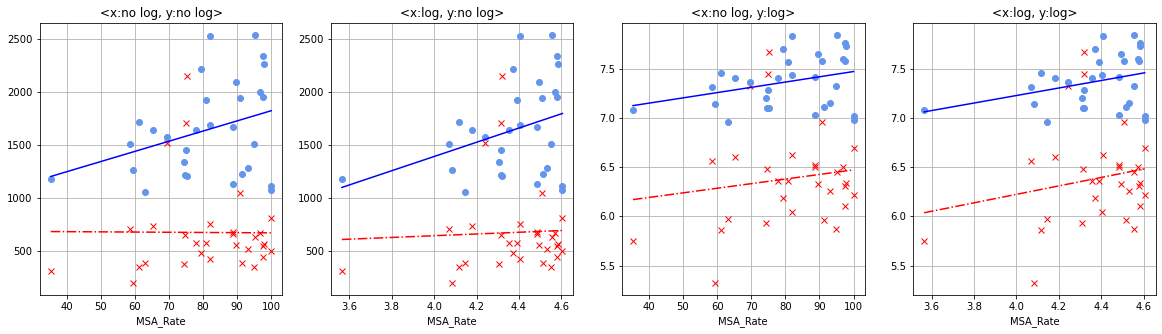

In [92]:
plt.figure(figsize=(20,5))
Data['log_MSA_Rate']=np.log(Data['MSA_Rate'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
MSA_Rate_data=make_data(Data,'MSA_Rate','Felony_Result','Misdemeanor_Result')
make_grahp(MSA_Rate_data,'MSA_Rate','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('MSA_Rate')

plt.subplot(142)
plt.title('<x:log, y:no log>')
MSA_Rate_data=make_data(Data,'log_MSA_Rate','Felony_Result','Misdemeanor_Result')
make_grahp(MSA_Rate_data,'log_MSA_Rate','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('MSA_Rate')

plt.subplot(143)
plt.title('<x:no log, y:log>')
MSA_Rate_data=make_data(Data,'MSA_Rate','log_Felony','log_Misdemeanor')
make_grahp(MSA_Rate_data,'MSA_Rate','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('MSA_Rate')

plt.subplot(144)
plt.title('<x:log, y:log>')
MSA_Rate_data=make_data(Data,'log_MSA_Rate','log_Felony','log_Misdemeanor')
make_grahp(MSA_Rate_data,'log_MSA_Rate','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('MSA_Rate')

In [93]:
fel_MSA_Rate=make_body(Data,'MSA_Rate','Felony_Result')
mis_MSA_Rate=make_body(Data,'MSA_Rate','Misdemeanor_Result')
fel_log_MSA_Rate=make_body(Data,'log_MSA_Rate','Felony_Result')
mis_log_MSA_Rate=make_body(Data,'log_MSA_Rate','Misdemeanor_Result')
log_fel_MSA_Rate=make_body(Data,'MSA_Rate','log_Felony')
log_mis_MSA_Rate=make_body(Data,'MSA_Rate','log_Misdemeanor')
log_fel_log_MSA_Rate=make_body(Data,'log_MSA_Rate','log_Felony')
log_mis_log_MSA_Rate=make_body(Data,'log_MSA_Rate','log_Misdemeanor')

In [38]:
fel_MSA_Rate_spear=stats.spearmanr(fel_MSA_Rate.MSA_Rate,fel_MSA_Rate.Felony_Result)
mis_MSA_Rate_spear=stats.spearmanr(mis_MSA_Rate.MSA_Rate,mis_MSA_Rate.Misdemeanor_Result)
print('fel: {}'.format(fel_MSA_Rate_spear))
print('mis: {}'.format(mis_MSA_Rate_spear))

fel: SpearmanrResult(correlation=0.09478251254557114, pvalue=0.6183360192097268)
mis: SpearmanrResult(correlation=0.29057737414205614, pvalue=0.1192903423759865)


In [94]:
fel_MSA_Rate_spear=stats.pearsonr(fel_MSA_Rate.MSA_Rate,fel_MSA_Rate.Felony_Result)
mis_MSA_Rate_spear=stats.pearsonr(mis_MSA_Rate.MSA_Rate,mis_MSA_Rate.Misdemeanor_Result)
print('fel: {}'.format(fel_MSA_Rate_spear))
print('mis: {}'.format(mis_MSA_Rate_spear))

fel: (-0.006901025520106088, 0.9711287036517644)
mis: (0.3341207441275552, 0.07114434342836738)


In [95]:
fel_MSA_Rate_pearson=stats.pearsonr(Data['MSA_Rate'],Data['Felony_Result'])
mis_MSA_Rate_pearson=stats.pearsonr(Data['MSA_Rate'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_MSA_Rate_pearson)
print(mis_MSA_Rate_pearson)

fel_log_MSA_Rate_pearson=stats.pearsonr(Data['log_MSA_Rate'],Data['Felony_Result'])
mis_log_MSA_Rate_pearson=stats.pearsonr(Data['log_MSA_Rate'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_MSA_Rate_pearson)
print(mis_log_MSA_Rate_pearson)

log_fel_MSA_Rate_pearson=stats.pearsonr(Data['MSA_Rate'],Data['log_Felony'])
log_mis_MSA_Rate_pearson=stats.pearsonr(Data['MSA_Rate'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_MSA_Rate_pearson)
print(log_mis_MSA_Rate_pearson)

log_fel_log_MSA_Rate_pearson=stats.pearsonr(Data['log_MSA_Rate'],Data['log_Felony'])
log_mis_log_MSA_Rate_pearson=stats.pearsonr(Data['log_MSA_Rate'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_MSA_Rate_pearson)
print(log_mis_log_MSA_Rate_pearson)


=======x:no log, y:no log========
(-0.006901025520106088, 0.9711287036517644)
(0.3341207441275552, 0.07114434342836738)

=======x:log, y:no log========
(0.04323285141820411, 0.8205480950018753)
(0.3367495955130305, 0.06881358149539461)

=======x:no log, y:log========
(0.1462920123308711, 0.4404752285646099)
(0.31095887210223105, 0.0944103354825562)

=======x:log, y:log========
(0.19395783852901283, 0.30441855366171644)
(0.31962602495565606, 0.08511125059449937)


In [96]:
import statsmodels.api as sm
mis_model_MSA_Rate = sm.OLS(Data['Misdemeanor_Result'],(Data['MSA_Rate']))
mis_result_MSA_Rate = mis_model_MSA_Rate.fit()
print(mis_result_MSA_Rate.summary())
fel_model_MSA_Rate = sm.OLS(Data['Felony_Result'],(Data['MSA_Rate']))
fel_result_MSA_Rate = fel_model_MSA_Rate.fit()
print(fel_result_MSA_Rate.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              396.1
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    1.88e-18
Time:                        11:25:01   Log-Likelihood:                         -225.50
No. Observations:                  30   AIC:                                      453.0
Df Residuals:                      29   BIC:                                      454.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Old_Rate


Felony 기울기 :  [-17.19938117]
Felony 절편 :  970.1347131539621

Misdemeanor 기울기 :  [-100.93796592]
Misdemeanor 절편 :  3361.0382539611364

Felony 기울기 :  [-177.8264624]
Felony 절편 :  1180.348664402101

Misdemeanor 기울기 :  [-1671.64522279]
Misdemeanor 절편 :  6369.781235521649

Felony 기울기 :  [-0.05110162]
Felony 절편 :  7.25314588044143

Misdemeanor 기울기 :  [-0.06148714]
Misdemeanor 절편 :  8.415784119177928

Felony 기울기 :  [-0.66880913]
Felony 절편 :  8.274720595833058

Misdemeanor 기울기 :  [-1.01483315]
Misdemeanor 절편 :  10.238797062774573


Text(0.5, 0, 'older_rate')

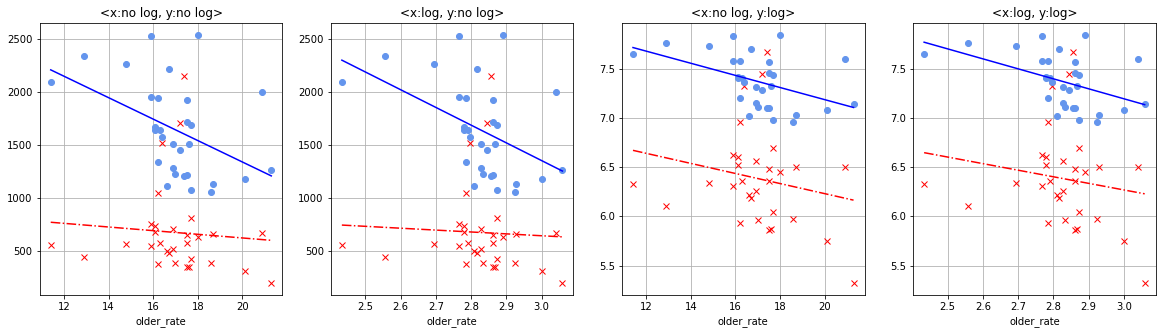

In [97]:
plt.figure(figsize=(20,5))
Data['log_older_rate']=np.log(Data['older_rate'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
older_rate_data=make_data(Data,'older_rate','Felony_Result','Misdemeanor_Result')
make_grahp(older_rate_data,'older_rate','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('older_rate')

plt.subplot(142)
plt.title('<x:log, y:no log>')
older_rate_data=make_data(Data,'log_older_rate','Felony_Result','Misdemeanor_Result')
make_grahp(older_rate_data,'log_older_rate','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('older_rate')

plt.subplot(143)
plt.title('<x:no log, y:log>')
older_rate_data=make_data(Data,'older_rate','log_Felony','log_Misdemeanor')
make_grahp(older_rate_data,'older_rate','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('older_rate')

plt.subplot(144)
plt.title('<x:log, y:log>')
older_rate_data=make_data(Data,'log_older_rate','log_Felony','log_Misdemeanor')
make_grahp(older_rate_data,'log_older_rate','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('older_rate')

In [98]:
fel_older_rate=make_body(Data,'older_rate','Felony_Result')
mis_older_rate=make_body(Data,'older_rate','Misdemeanor_Result')
fel_older_rate_spear=stats.spearmanr(fel_older_rate.older_rate,fel_older_rate.Felony_Result)
mis_older_rate_spear=stats.spearmanr(mis_older_rate.older_rate,mis_older_rate.Misdemeanor_Result)
print('fel: {}'.format(fel_older_rate_spear))
print('mis: {}'.format(mis_older_rate_spear))

fel: SpearmanrResult(correlation=-0.22180169248629789, pvalue=0.23880462909483827)
mis: SpearmanrResult(correlation=-0.4792341789462982, pvalue=0.0073737113431139424)


In [99]:
fel_older_rate=make_body(Data,'older_rate','Felony_Result')
mis_older_rate=make_body(Data,'older_rate','Misdemeanor_Result')
fel_older_rate_spear=stats.pearsonr(fel_older_rate.older_rate,fel_older_rate.Felony_Result)
mis_older_rate_spear=stats.pearsonr(mis_older_rate.older_rate,mis_older_rate.Misdemeanor_Result)
print('fel: {}'.format(fel_older_rate_spear))
print('mis: {}'.format(mis_older_rate_spear))

fel: (-0.07964456192762978, 0.6756833552359871)
mis: (-0.44228862662605206, 0.014393485724428952)


In [100]:
fel_older_rate_pearson=stats.pearsonr(Data['older_rate'],Data['Felony_Result'])
mis_older_rate_pearson=stats.pearsonr(Data['older_rate'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_older_rate_pearson)
print(mis_older_rate_pearson)

fel_log_older_rate_pearson=stats.pearsonr(Data['log_older_rate'],Data['Felony_Result'])
mis_log_older_rate_pearson=stats.pearsonr(Data['log_older_rate'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_older_rate_pearson)
print(mis_log_older_rate_pearson)

log_fel_older_rate_pearson=stats.pearsonr(Data['older_rate'],Data['log_Felony'])
log_mis_older_rate_pearson=stats.pearsonr(Data['older_rate'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_older_rate_pearson)
print(log_mis_older_rate_pearson)

log_fel_log_older_rate_pearson=stats.pearsonr(Data['log_older_rate'],Data['log_Felony'])
log_mis_log_older_rate_pearson=stats.pearsonr(Data['log_older_rate'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_older_rate_pearson)
print(log_mis_log_older_rate_pearson)


=======x:no log, y:no log========
(-0.07964456192762978, 0.6756833552359871)
(-0.44228862662605206, 0.014393485724428952)

=======x:log, y:no log========
(-0.05094885306736429, 0.7891810066115031)
(-0.45320015626423205, 0.011900638513857864)

=======x:no log, y:log========
(-0.20131330424167354, 0.2860825624464724)
(-0.4491483296158103, 0.012780360652137371)

=======x:log, y:log========
(-0.16301768189823723, 0.38939045337203404)
(-0.4586642415646295, 0.010795089598472597)


In [101]:
import statsmodels.api as sm
mis_model_older_rate = sm.OLS(Data['Misdemeanor_Result'],(Data['older_rate']))
mis_result_older_rate = mis_model_older_rate.fit()
print(mis_result_older_rate.summary())
fel_model_older_rate = sm.OLS(Data['Felony_Result'],(Data['older_rate']))
fel_result_older_rate = fel_model_older_rate.fit()
print(fel_result_older_rate.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              252.1
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    7.67e-16
Time:                        11:26:09   Log-Likelihood:                         -231.70
No. Observations:                  30   AIC:                                      465.4
Df Residuals:                      29   BIC:                                      466.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Gender


Felony 기울기 :  [76.59772944]
Felony 절편 :  -3204.2276946762086

Misdemeanor 기울기 :  [-270.46024037]
Misdemeanor 절편 :  15352.017815057636

Felony 기울기 :  [3830.92775892]
Felony 절편 :  -14360.431480011292

Misdemeanor 기울기 :  [-13732.23050983]
Misdemeanor 절편 :  55550.49697317069

Felony 기울기 :  [0.012437]
Felony 절편 :  5.754111257513882

Misdemeanor 기울기 :  [-0.16278904]
Misdemeanor 절편 :  15.620651375968567

Felony 기울기 :  [0.5737572]
Felony 절편 :  4.132153952956687

Misdemeanor 기울기 :  [-8.2651931]
Misdemeanor 절편 :  39.815237394394515


Text(0.5, 0, 'Female_Rate')

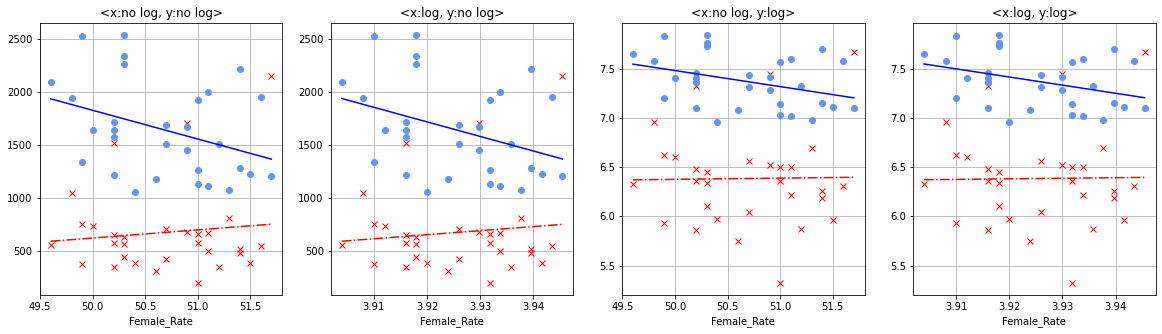

In [102]:
plt.figure(figsize=(20,5))
Data['log_Female_Rate']=np.log(Data['Female_Rate'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
Female_Rate_data=make_data(Data,'Female_Rate','Felony_Result','Misdemeanor_Result')
make_grahp(Female_Rate_data,'Female_Rate','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Female_Rate')

plt.subplot(142)
plt.title('<x:log, y:no log>')
Female_Rate_data=make_data(Data,'log_Female_Rate','Felony_Result','Misdemeanor_Result')
make_grahp(Female_Rate_data,'log_Female_Rate','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Female_Rate')

plt.subplot(143)
plt.title('<x:no log, y:log>')
Female_Rate_data=make_data(Data,'Female_Rate','log_Felony','log_Misdemeanor')
make_grahp(Female_Rate_data,'Female_Rate','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Female_Rate')

plt.subplot(144)
plt.title('<x:log, y:log>')
Female_Rate_data=make_data(Data,'log_Female_Rate','log_Felony','log_Misdemeanor')
make_grahp(Female_Rate_data,'log_Female_Rate','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Female_Rate')

In [103]:
mis_model_Female = sm.OLS(Data['Misdemeanor_Result'],(Data['Female_Rate']))
mis_result_Female = mis_model_Female.fit()
print(mis_result_Female.summary())
fel_model_Female = sm.OLS(Data['Felony_Result'],(Data['Female_Rate']))
fel_result_Female= fel_model_Female.fit()
print(fel_result_Female.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              391.9
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    2.17e-18
Time:                        11:26:11   Log-Likelihood:                         -225.65
No. Observations:                  30   AIC:                                      453.3
Df Residuals:                      29   BIC:                                      454.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [104]:
fel_Female_Rate=make_body(Data,'Female_Rate','Felony_Result')
mis_Female_Rate=make_body(Data,'Female_Rate','Misdemeanor_Result')
fel_Female_Rate_spear=stats.spearmanr(fel_Female_Rate.Female_Rate,fel_Female_Rate.Felony_Result)
mis_Female_Rate_spear=stats.spearmanr(mis_Female_Rate.Female_Rate,mis_Female_Rate.Misdemeanor_Result)
print('fel: {}'.format(fel_Female_Rate_spear))
print('mis: {}'.format(mis_Female_Rate_spear))

fel: SpearmanrResult(correlation=-0.09992226468343454, pvalue=0.5993334931069082)
mis: SpearmanrResult(correlation=-0.3294312163781983, pvalue=0.07545344421265422)


In [105]:
fel_Female_Rate=make_body(Data,'Female_Rate','Felony_Result')
mis_Female_Rate=make_body(Data,'Female_Rate','Misdemeanor_Result')
fel_Female_Rate_spear=stats.pearsonr(fel_Female_Rate.Female_Rate,fel_Female_Rate.Felony_Result)
mis_Female_Rate_spear=stats.pearsonr(mis_Female_Rate.Female_Rate,mis_Female_Rate.Misdemeanor_Result)
print('fel: {}'.format(fel_Female_Rate_spear))
print('mis: {}'.format(mis_Female_Rate_spear))

fel: (0.1065843331853541, 0.5750829757274476)
mis: (-0.35611381542836473, 0.053422236765965914)


In [106]:
fel_Female_Rate_pearson=stats.pearsonr(Data['Female_Rate'],Data['Felony_Result'])
mis_Female_Rate_pearson=stats.pearsonr(Data['Female_Rate'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_Female_Rate_pearson)
print(mis_Female_Rate_pearson)

fel_log_Female_Rate_pearson=stats.pearsonr(Data['log_Female_Rate'],Data['Felony_Result'])
mis_log_Female_Rate_pearson=stats.pearsonr(Data['log_Female_Rate'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_Female_Rate_pearson)
print(mis_log_Female_Rate_pearson)

log_fel_Female_Rate_pearson=stats.pearsonr(Data['Female_Rate'],Data['log_Felony'])
log_mis_Female_Rate_pearson=stats.pearsonr(Data['Female_Rate'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_Female_Rate_pearson)
print(log_mis_Female_Rate_pearson)

log_fel_log_Female_Rate_pearson=stats.pearsonr(Data['log_Female_Rate'],Data['log_Felony'])
log_mis_log_Female_Rate_pearson=stats.pearsonr(Data['log_Female_Rate'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_Female_Rate_pearson)
print(log_mis_log_Female_Rate_pearson)


=======x:no log, y:no log========
(0.1065843331853541, 0.5750829757274476)
(-0.35611381542836473, 0.053422236765965914)

=======x:log, y:no log========
(0.10519798530802524, 0.5800931162439602)
(-0.3568226887950811, 0.0529153084548562)

=======x:no log, y:log========
(0.014722702616161078, 0.938450856835762)
(-0.3573261961471571, 0.0525575539323144)

=======x:log, y:log========
(0.013403743216907783, 0.9439558422607248)
(-0.35802939197486155, 0.05206111630108784)


# Traveler_spending


Felony 기울기 :  [-0.00115882]
Felony 절편 :  711.0086062979472

Misdemeanor 기울기 :  [0.00518337]
Misdemeanor 절편 :  1496.3063626245503

Felony 기울기 :  [-7.25724395]
Felony 절편 :  748.4712502521724

Misdemeanor 기울기 :  [204.59354375]
Misdemeanor 절편 :  -348.78893955335843

Felony 기울기 :  [1.13056449e-07]
Felony 절편 :  6.381173087888522

Misdemeanor 기울기 :  [3.04298416e-06]
Misdemeanor 절편 :  7.283155282941975

Felony 기울기 :  [0.05193238]
Felony 절편 :  5.878307448958039

Misdemeanor 기울기 :  [0.12348324]
Misdemeanor 절편 :  6.167087563226083


Text(0.5, 0, 'Traveler_spending')

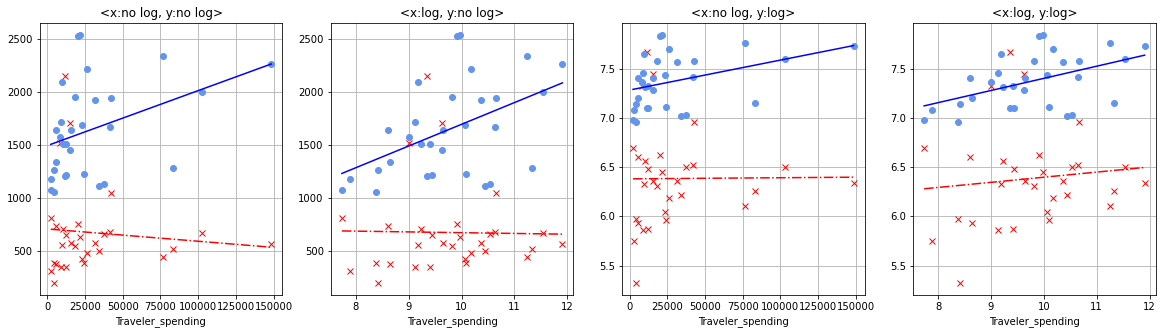

In [107]:
plt.figure(figsize=(20,5))
Data['log_Traveler_spending']=np.log(Data['Traveler_spending'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
Traveler_spending_data=make_data(Data,'Traveler_spending','Felony_Result','Misdemeanor_Result')
make_grahp(Traveler_spending_data,'Traveler_spending','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Traveler_spending')

plt.subplot(142)
plt.title('<x:log, y:no log>')
Traveler_spending_data=make_data(Data,'log_Traveler_spending','Felony_Result','Misdemeanor_Result')
make_grahp(Traveler_spending_data,'log_Traveler_spending','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Traveler_spending')

plt.subplot(143)
plt.title('<x:no log, y:log>')
Traveler_spending_data=make_data(Data,'Traveler_spending','log_Felony','log_Misdemeanor')
make_grahp(Traveler_spending_data,'Traveler_spending','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Traveler_spending')

plt.subplot(144)
plt.title('<x:log, y:log>')
Traveler_spending_data=make_data(Data,'log_Traveler_spending','log_Felony','log_Misdemeanor')
make_grahp(Traveler_spending_data,'log_Traveler_spending','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Traveler_spending')

In [108]:
mis_model_Travel = sm.OLS(Data['Misdemeanor_Result'],(Data['Traveler_spending']))
mis_result_Travel = mis_model_Travel.fit()
print(mis_result_Travel.summary())
fel_model_Travel= sm.OLS(Data['Felony_Result'],(Data['Traveler_spending']))
fel_result_Travel = fel_model_Travel.fit()
print(fel_result_Travel.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.490
Method:                 Least Squares   F-statistic:                              29.79
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    7.10e-06
Time:                        11:28:31   Log-Likelihood:                         -255.17
No. Observations:                  30   AIC:                                      512.3
Df Residuals:                      29   BIC:                                      513.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [109]:
fel_Traveler_spending=make_body(Data,'Traveler_spending','Felony_Result')
mis_Traveler_spending=make_body(Data,'Traveler_spending','Misdemeanor_Result')
fel_Traveler_spending_spear=stats.spearmanr(fel_Traveler_spending.Traveler_spending,fel_Traveler_spending.Felony_Result)
mis_Traveler_spending_spear=stats.spearmanr(mis_Traveler_spending.Traveler_spending,mis_Traveler_spending.Misdemeanor_Result)
print('fel: {}'.format(fel_Traveler_spending_spear))
print('mis: {}'.format(mis_Traveler_spending_spear))

fel: SpearmanrResult(correlation=0.12169076751946609, pvalue=0.521786771413325)
mis: SpearmanrResult(correlation=0.4522803114571746, pvalue=0.012095766128417288)


In [110]:
fel_Traveler_spending=make_body(Data,'Traveler_spending','Felony_Result')
mis_Traveler_spending=make_body(Data,'Traveler_spending','Misdemeanor_Result')
fel_Traveler_spending_spear=stats.pearsonr(fel_Traveler_spending.Traveler_spending,fel_Traveler_spending.Felony_Result)
mis_Traveler_spending_spear=stats.pearsonr(mis_Traveler_spending.Traveler_spending,mis_Traveler_spending.Misdemeanor_Result)
print('fel: {}'.format(fel_Traveler_spending_spear))
print('mis: {}'.format(mis_Traveler_spending_spear))

fel: (-0.09110604652428952, 0.6320790841063705)
mis: (0.38561353970925705, 0.035333560787549255)


In [111]:
fel_Traveler_spending_pearson=stats.pearsonr(Data['Traveler_spending'],Data['Felony_Result'])
mis_Traveler_spending_pearson=stats.pearsonr(Data['Traveler_spending'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_Traveler_spending_pearson)
print(mis_Traveler_spending_pearson)

fel_log_Traveler_spending_pearson=stats.pearsonr(Data['log_Traveler_spending'],Data['Felony_Result'])
mis_log_Traveler_spending_pearson=stats.pearsonr(Data['log_Traveler_spending'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_Traveler_spending_pearson)
print(mis_log_Traveler_spending_pearson)

log_fel_Traveler_spending_pearson=stats.pearsonr(Data['Traveler_spending'],Data['log_Felony'])
log_mis_Traveler_spending_pearson=stats.pearsonr(Data['Traveler_spending'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_Traveler_spending_pearson)
print(log_mis_Traveler_spending_pearson)

log_fel_log_Traveler_spending_pearson=stats.pearsonr(Data['log_Traveler_spending'],Data['log_Felony'])
log_mis_log_Traveler_spending_pearson=stats.pearsonr(Data['log_Traveler_spending'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_Traveler_spending_pearson)
print(log_mis_log_Traveler_spending_pearson)


=======x:no log, y:no log========
(-0.09110604652428952, 0.6320790841063705)
(0.38561353970925705, 0.035333560787549255)

=======x:log, y:no log========
(-0.017938950686353775, 0.9250392426177577)
(0.47854761393127165, 0.007470889364604806)

=======x:no log, y:log========
(0.007561738352231603, 0.9683658392992671)
(0.3773928934534225, 0.03978627287984944)

=======x:log, y:log========
(0.10920889134070025, 0.5656514138595524)
(0.481499188368966, 0.007060675899099924)


# Temper


Felony 기울기 :  [40.41582061]
Felony 절편 :  246.64314683080727

Misdemeanor 기울기 :  [54.13433602]
Misdemeanor 절편 :  1067.6599157980731

Felony 기울기 :  [476.52564828]
Felony 절편 :  -418.3454509954306

Misdemeanor 기울기 :  [588.58632728]
Misdemeanor 절편 :  291.2433761652221

Felony 기울기 :  [0.0533638]
Felony 절편 :  5.815204423438572

Misdemeanor 기울기 :  [0.0315983]
Misdemeanor 절편 :  7.033454286926876

Felony 기울기 :  [0.6541306]
Felony 절편 :  4.879805798597054

Misdemeanor 기울기 :  [0.34448634]
Misdemeanor 절편 :  6.578125162010191


Text(0.5, 0, 'Temper')

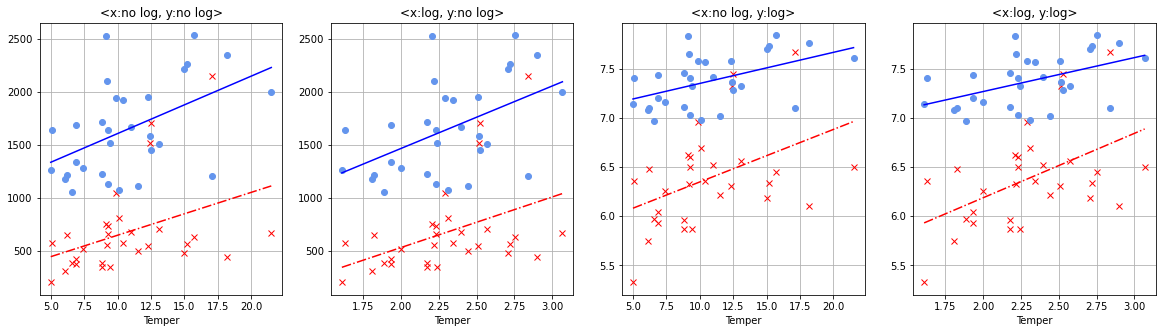

In [112]:
plt.figure(figsize=(20,5))
Data['log_Temper']=np.log(Data['Temper'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
Temper_data=make_data(Data,'Temper','Felony_Result','Misdemeanor_Result')
make_grahp(Temper_data,'Temper','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Temper')

plt.subplot(142)
plt.title('<x:log, y:no log>')
Temper_data=make_data(Data,'log_Temper','Felony_Result','Misdemeanor_Result')
make_grahp(Temper_data,'log_Temper','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Temper')

plt.subplot(143)
plt.title('<x:no log, y:log>')
Temper_data=make_data(Data,'Temper','log_Felony','log_Misdemeanor')
make_grahp(Temper_data,'Temper','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Temper')

plt.subplot(144)
plt.title('<x:log, y:log>')
Temper_data=make_data(Data,'log_Temper','log_Felony','log_Misdemeanor')
make_grahp(Temper_data,'log_Temper','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Temper')

In [113]:
mis_model_Temper = sm.OLS(Data['Misdemeanor_Result'],(Data['Temper']))
mis_result_Temper = mis_model_Temper.fit()
print(mis_result_Education.summary())
fel_model_Temper = sm.OLS(Data['Felony_Result'],(Data['Temper']))
fel_result_Temper = fel_model_Temper.fit()
print(fel_result_Temper.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              101.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    5.57e-11
Time:                        11:29:18   Log-Likelihood:                         -243.21
No. Observations:                  30   AIC:                                      488.4
Df Residuals:                      29   BIC:                                      489.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [114]:
fel_Temper=make_body(Data,'Temper','Felony_Result')
mis_Temper=make_body(Data,'Temper','Misdemeanor_Result')
fel_Temper_spear=stats.spearmanr(fel_Temper.Temper,fel_Temper.Felony_Result)
mis_Temper_spear=stats.spearmanr(mis_Temper.Temper,mis_Temper.Misdemeanor_Result)
print('fel: {}'.format(fel_Temper_spear))
print('mis: {}'.format(mis_Temper_spear))

fel: SpearmanrResult(correlation=0.47735620774711984, pvalue=0.007642098914405385)
mis: SpearmanrResult(correlation=0.4239457229642254, pvalue=0.019558473940602776)


In [115]:
fel_Temper=make_body(Data,'Temper','Felony_Result')
mis_Temper=make_body(Data,'Temper','Misdemeanor_Result')
fel_Temper_spear=stats.pearsonr(fel_Temper.Temper,fel_Temper.Felony_Result)
mis_Temper_spear=stats.pearsonr(mis_Temper.Temper,mis_Temper.Misdemeanor_Result)
print('fel: {}'.format(fel_Temper_spear))
print('mis: {}'.format(mis_Temper_spear))

fel: (0.3855925061304431, 0.03534441749276807)
mis: (0.48871752699804527, 0.006137156531924985)


In [116]:
fel_Temper_pearson=stats.pearsonr(Data['Temper'],Data['Felony_Result'])
mis_Temper_pearson=stats.pearsonr(Data['Temper'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_Temper_pearson)
print(mis_Temper_pearson)

fel_log_Temper_pearson=stats.pearsonr(Data['log_Temper'],Data['Felony_Result'])
mis_log_Temper_pearson=stats.pearsonr(Data['log_Temper'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_Temper_pearson)
print(mis_log_Temper_pearson)

log_fel_Temper_pearson=stats.pearsonr(Data['Temper'],Data['log_Felony'])
log_mis_Temper_pearson=stats.pearsonr(Data['Temper'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_Temper_pearson)
print(log_mis_Temper_pearson)

log_fel_log_Temper_pearson=stats.pearsonr(Data['log_Temper'],Data['log_Felony'])
log_mis_log_Temper_pearson=stats.pearsonr(Data['log_Temper'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_Temper_pearson)
print(log_mis_log_Temper_pearson)


=======x:no log, y:no log========
(0.3855925061304431, 0.03534441749276807)
(0.48871752699804527, 0.006137156531924985)

=======x:log, y:no log========
(0.4192965025938286, 0.021086131644988106)
(0.49006427571028793, 0.005976757998385488)

=======x:no log, y:log========
(0.433130185094087, 0.016808433539887063)
(0.4755575683184064, 0.007906857562588602)

=======x:log, y:log========
(0.48965920136689745, 0.006024622982468623)
(0.47815552982589293, 0.0075268709608966615)


# Penalty


Felony 기울기 :  [-0.26638431]
Felony 절편 :  783.614917524982

Misdemeanor 기울기 :  [0.18388018]
Misdemeanor 절편 :  1547.617524988304

Felony 기울기 :  [-37.44159589]
Felony 절편 :  896.3805902235282

Misdemeanor 기울기 :  [159.78666933]
Misdemeanor 절편 :  763.7450760034453

Felony 기울기 :  [-0.00027416]
Felony 절편 :  6.493377894940224

Misdemeanor 기울기 :  [0.0001113]
Misdemeanor 절편 :  7.311503402414862

Felony 기울기 :  [-0.01994063]
Felony 절편 :  6.500859026171509

Misdemeanor 기울기 :  [0.09907071]
Misdemeanor 절편 :  6.824050766919208


Text(0.5, 0, 'penalty')

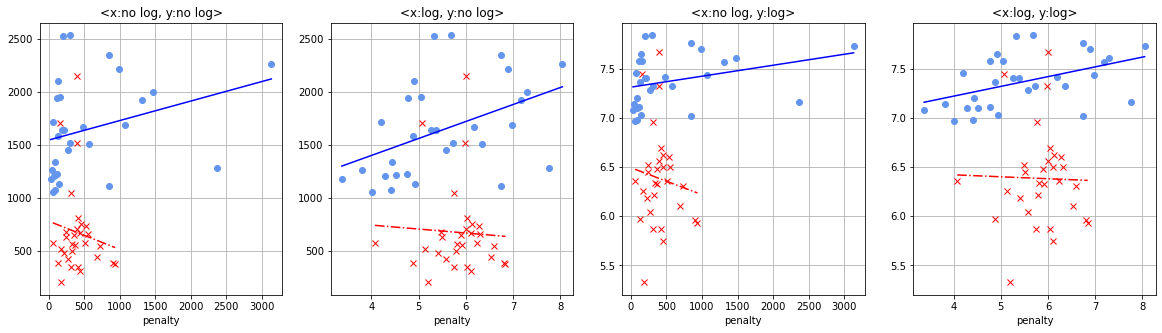

In [117]:
plt.figure(figsize=(20,5))
Data['log_Felony_sentence_aver']=np.log(Data['Felony_sentence_aver'])
Data['log_GDP_penalty']=np.log(Data['GDP_penalty'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
fel_penalty_data=penalty_make_data(Data,'Felony_sentence_aver','Felony_Result','Misdemeanor_Result')
mis_penalty_data=penalty_make_data(Data,'GDP_penalty','Felony_Result','Misdemeanor_Result')
penalty_make_grahp(fel_penalty_data,mis_penalty_data,'Felony_sentence_aver','GDP_penalty','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('penalty')

plt.subplot(142)
plt.title('<x:log, y:no log>')
fel_log_penalty_data=penalty_make_data(Data,'log_Felony_sentence_aver','Felony_Result','Misdemeanor_Result')
mis_log_penalty_data=penalty_make_data(Data,'log_GDP_penalty','Felony_Result','Misdemeanor_Result')
penalty_make_grahp(fel_log_penalty_data,mis_log_penalty_data,'log_Felony_sentence_aver','log_GDP_penalty','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('penalty')

plt.subplot(143)
plt.title('<x:no log, y:log>')
log_fel_penalty_data=penalty_make_data(Data,'Felony_sentence_aver','log_Felony','log_Misdemeanor')
log_mis_penalty_data=penalty_make_data(Data,'GDP_penalty','log_Felony','log_Misdemeanor')
penalty_make_grahp(log_fel_penalty_data,log_mis_penalty_data,'Felony_sentence_aver','GDP_penalty','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('penalty')

plt.subplot(144)
plt.title('<x:log, y:log>')
log_fel_log_penalty_data=penalty_make_data(Data,'log_Felony_sentence_aver','log_Felony','log_Misdemeanor')
log_mis_log_penalty_data=penalty_make_data(Data,'log_GDP_penalty','log_Felony','log_Misdemeanor')
penalty_make_grahp(log_fel_log_penalty_data,log_mis_log_penalty_data,'log_Felony_sentence_aver','log_GDP_penalty','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('penalty')

In [118]:
mis_model_penalty = sm.OLS(Data['Misdemeanor_Result'],(Data['GDP_penalty']))
mis_result_penalty = mis_model_penalty.fit()
print(mis_result_penalty.summary())
fel_model_penalty = sm.OLS(Data['Felony_Result'],(Data['Felony_sentence_aver']))
fel_result_penalty = fel_model_penalty.fit()
print(fel_result_penalty.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.404
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                              19.67
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    0.000122
Time:                        11:29:50   Log-Likelihood:                         -258.01
No. Observations:                  30   AIC:                                      518.0
Df Residuals:                      29   BIC:                                      519.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [119]:
Felony_sentence_aver_rate=make_body(Data,'Felony_sentence_aver','Felony_Result')
GDP_penalty_rate=make_body(Data,'GDP_penalty','Misdemeanor_Result')
Felony_sentence_aver_rate_spear=stats.spearmanr(Felony_sentence_aver_rate.Felony_sentence_aver,Felony_sentence_aver_rate.Felony_Result)
GDP_penalty_rate_spear=stats.spearmanr(GDP_penalty_rate.GDP_penalty,GDP_penalty_rate.Misdemeanor_Result)
print('fel: {}'.format(Felony_sentence_aver_rate_spear))
print('mis: {}'.format(GDP_penalty_rate_spear))

fel: SpearmanrResult(correlation=0.0008901747463815757, pvalue=0.9962750877252801)
mis: SpearmanrResult(correlation=0.5114571746384872, pvalue=0.0038681721623063095)


In [120]:
Felony_sentence_aver_rate=make_body(Data,'Felony_sentence_aver','Felony_Result')
GDP_penalty_rate=make_body(Data,'GDP_penalty','Misdemeanor_Result')
Felony_sentence_aver_rate_spear=stats.pearsonr(Felony_sentence_aver_rate.Felony_sentence_aver,Felony_sentence_aver_rate.Felony_Result)
GDP_penalty_rate_spear=stats.pearsonr(GDP_penalty_rate.GDP_penalty,GDP_penalty_rate.Misdemeanor_Result)
print('fel: {}'.format(Felony_sentence_aver_rate_spear))
print('mis: {}'.format(GDP_penalty_rate_spear))

fel: (-0.13139799650511358, 0.4888584933756539)
mis: (0.3005851521345069, 0.10652921134426817)


In [121]:
fel_Felony_sentence_aver_pearson=stats.pearsonr(Data['Felony_sentence_aver'],Data['Felony_Result'])
mis_GDP_penalty_pearson=stats.pearsonr(Data['GDP_penalty'],Data['Misdemeanor_Result'])
print('\n=======x:no log, y:no log========')
print(fel_Felony_sentence_aver_pearson)
print(mis_GDP_penalty_pearson)

fel_log_Felony_sentence_aver_pearson=stats.pearsonr(Data['log_Felony_sentence_aver'],Data['Felony_Result'])
mis_log_GDP_penalty_pearson=stats.pearsonr(Data['log_GDP_penalty'],Data['Misdemeanor_Result'])
print('\n=======x:log, y:no log========')
print(fel_log_Felony_sentence_aver_pearson)
print(mis_log_GDP_penalty_pearson)

log_fel_Felony_sentence_aver_pearson=stats.pearsonr(Data['Felony_sentence_aver'],Data['log_Felony'])
log_mis_GDP_penalty_pearson=stats.pearsonr(Data['GDP_penalty'],Data['log_Misdemeanor'])
print('\n=======x:no log, y:log========')
print(log_fel_Felony_sentence_aver_pearson)
print(log_mis_GDP_penalty_pearson)

log_fel_log_Felony_sentence_aver_pearson=stats.pearsonr(Data['log_Felony_sentence_aver'],Data['log_Felony'])
log_mis_log_GDP_penalty_pearson=stats.pearsonr(Data['log_GDP_penalty'],Data['log_Misdemeanor'])
print('\n=======x:log, y:log========')
print(log_fel_log_Felony_sentence_aver_pearson)
print(log_mis_log_GDP_penalty_pearson)


=======x:no log, y:no log========
(-0.13139799650511358, 0.4888584933756539)
(0.3005851521345069, 0.10652921134426817)

=======x:log, y:no log========
(-0.05189238274775623, 0.785366400920994)
(0.4434765142612095, 0.014102593460194046)

=======x:no log, y:log========
(-0.11504745237884742, 0.5449259931016252)
(0.30330167960226173, 0.10324873179256265)

=======x:log, y:log========
(-0.023511618614997537, 0.9018511325165848)
(0.4583842333042495, 0.010849567215661915)


# Gun_ownership


Felony 기울기 :  [10.10389221]
Felony 절편 :  337.2440659887449

Misdemeanor 기울기 :  [0.69636041]
Misdemeanor 절편 :  1621.6254876257524

Felony 기울기 :  [209.8530233]
Felony 절편 :  -39.4017052718641

Misdemeanor 기울기 :  [142.57400239]
Misdemeanor 절편 :  1157.8636872891982

Felony 기울기 :  [0.00744674]
Felony 절편 :  6.133463294539309

Misdemeanor 기울기 :  [0.00087426]
Misdemeanor 절편 :  7.34104021592655

Felony 기울기 :  [0.16580387]
Felony 절편 :  5.817803958277863

Misdemeanor 기울기 :  [0.09889424]
Misdemeanor 절편 :  7.032543888758612


Text(0.5, 0, 'Gun_ownership')

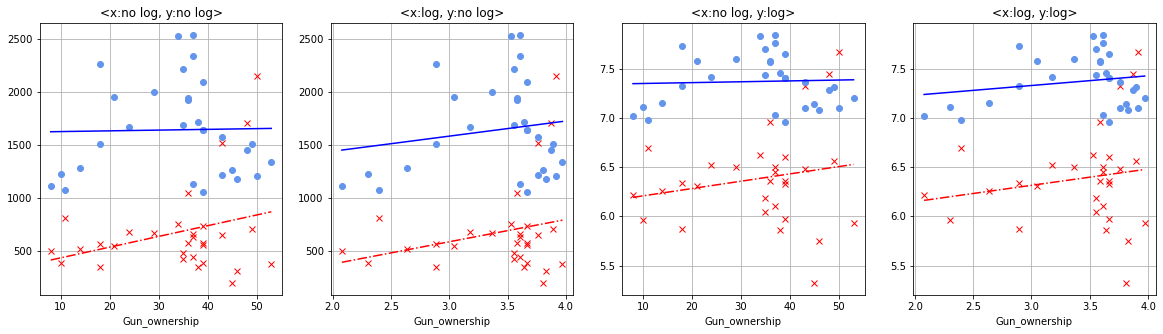

In [122]:
plt.figure(figsize=(20,5))
Data['log_Gun_ownership']=np.log(Data['Gun_ownership'])

plt.subplot(141)
plt.title('<x:no log, y:no log>')
Temper_data=make_data(Data,'Gun_ownership','Felony_Result','Misdemeanor_Result')
make_grahp(Temper_data,'Gun_ownership','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Gun_ownership')

plt.subplot(142)
plt.title('<x:log, y:no log>')
Temper_data=make_data(Data,'log_Gun_ownership','Felony_Result','Misdemeanor_Result')
make_grahp(Temper_data,'log_Gun_ownership','Felony_Result','Misdemeanor_Result')
plt.grid(True)
plt.xlabel('Gun_ownership')

plt.subplot(143)
plt.title('<x:no log, y:log>')
Temper_data=make_data(Data,'Gun_ownership','log_Felony','log_Misdemeanor')
make_grahp(Temper_data,'Gun_ownership','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Gun_ownership')

plt.subplot(144)
plt.title('<x:log, y:log>')
Temper_data=make_data(Data,'log_Gun_ownership','log_Felony','log_Misdemeanor')
make_grahp(Temper_data,'log_Gun_ownership','log_Felony','log_Misdemeanor')
plt.grid(True)
plt.xlabel('Gun_ownership')

In [123]:
mis_model_Gun = sm.OLS(Data['Misdemeanor_Result'],(Data['Gun_ownership']))
mis_result_Gun = mis_model_Gun.fit()
print(mis_result_Gun.summary())
fel_model_Gun = sm.OLS(Data['Felony_Result'],(Data['Gun_ownership']))
fel_result_Gun = fel_model_Gun.fit()
print(fel_result_Gun.summary())

                                 OLS Regression Results                                
Dep. Variable:     Misdemeanor_Result   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.819
Method:                 Least Squares   F-statistic:                              137.1
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                    1.65e-12
Time:                        11:30:57   Log-Likelihood:                         -239.60
No. Observations:                  30   AIC:                                      481.2
Df Residuals:                      29   BIC:                                      482.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [124]:
fel_Gun=make_body(Data,'Gun_ownership','Felony_Result')
mis_Gun=make_body(Data,'Gun_ownership','Misdemeanor_Result')
fel_Gun_spear=stats.spearmanr(fel_Gun.Gun_ownership,fel_Gun.Felony_Result)
mis_Gun_spear=stats.spearmanr(mis_Gun.Gun_ownership,mis_Gun.Misdemeanor_Result)
print('fel: {}'.format(fel_Gun_spear))
print('mis: {}'.format(mis_Gun_spear))

fel: SpearmanrResult(correlation=0.10922893137078232, pvalue=0.5655796694710657)
mis: SpearmanrResult(correlation=-0.170530882650303, pvalue=0.36760320492591125)


In [125]:
fel_Gun=make_body(Data,'Gun_ownership','Felony_Result')
mis_Gun=make_body(Data,'Gun_ownership','Misdemeanor_Result')
fel_Gun_spear=stats.pearsonr(fel_Gun.Gun_ownership,fel_Gun.Felony_Result)
mis_Gun_spear=stats.pearsonr(mis_Gun.Gun_ownership,mis_Gun.Misdemeanor_Result)
print('fel: {}'.format(fel_Gun_spear))
print('mis: {}'.format(mis_Gun_spear))

fel: (0.30059519870883905, 0.10651693698470219)
mis: (0.019603576958872077, 0.9181054953784521)


# correlation_list

In [130]:
List=['GDP','Education','Happy','PCPI','Area_police','MSA','Old_rate','Gender','Travel','Temperature','Penalty','gun']
Misdemeanor_person=['0.371','-0.557','0.135','-0.179','0.629','0.334','-0.442','-0.356','0.385','0.488','0.300','0.019']

Felony_person=['-0.136','-0.321','-0.473','-0.333','-0.021','-0.006','-0.079','0.106','-0.091','0.385','-0.131','0.300']
result_person=pd.DataFrame({'Misdemeanor':Misdemeanor_person,'Felony':Felony_person},index=List)
result_person.sort_values(by='Misdemeanor')

,Misdemeanor,Felony
PCPI,-0.179,-0.333
Gender,-0.356,0.106
Old_rate,-0.442,-0.079
Education,-0.557,-0.321
gun,0.019,0.300
Happy,0.135,-0.473
Penalty,0.300,-0.131
MSA,0.334,-0.006
GDP,0.371,-0.136
Travel,0.385,-0.091


In [135]:
mis_cor = [0.629, 0.488, 0.385, 0.371, 0.334, 0.300, 0.135, 0.019, -0.179, -0.356, -0.442, -0.557]
index_list = ['area_police','temper','travel','GDP','MSA','penalty','happy','gun_ownership','PCPI','gender','old_rate','educaton']
fel_cor = [-0.021, 0.385, -0.091, -0.136, -0.006, -0.131, -0.473, 0.300, -0.333, 0.106, -0.079, -0.321]

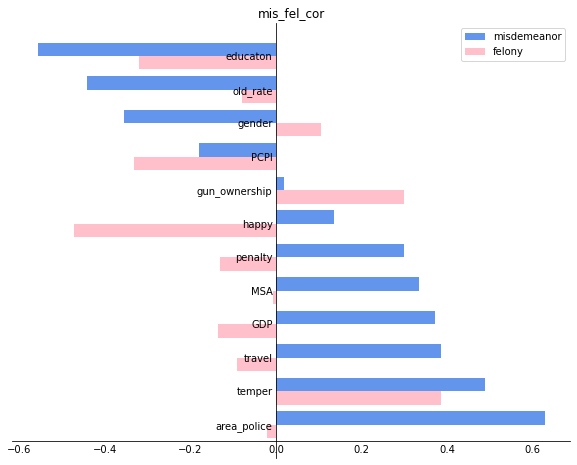

In [136]:
# yticks = ['Education','Old_rate', 'Gender','PCPI','Gun_ownership','Happy','MSA','GDP','Temperature','Travel','Penalty','Area_plice']

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('mis_fel_cor')

ax.spines['left'].set_position(('data', 0))        # 왼쪽 축을 가운데 위치로 이동
ax.spines['right'].set_visible(False)          # 오른쪽 축을 보이지 않도록
ax.spines['top'].set_visible(False)            # 위 축을 보이지 않도록
ax.spines['bottom'].set_position(('data', -0.5))   # 아래 축을 데이터 0의 위치로 이동
ax.tick_params('both', length=0) 

y = np.arange(len(index_list))
width = 0.4

ax.barh(y + width/2,mis_cor,width,color='cornflowerblue',label='misdemeanor')
ax.barh(y - width/2,fel_cor,width,color='pink',label='felony')
ax.set_yticks(range(len(index_list)))
ax.set_yticklabels(index_list)
plt.legend()
# plt.grid(True)
plt.show()

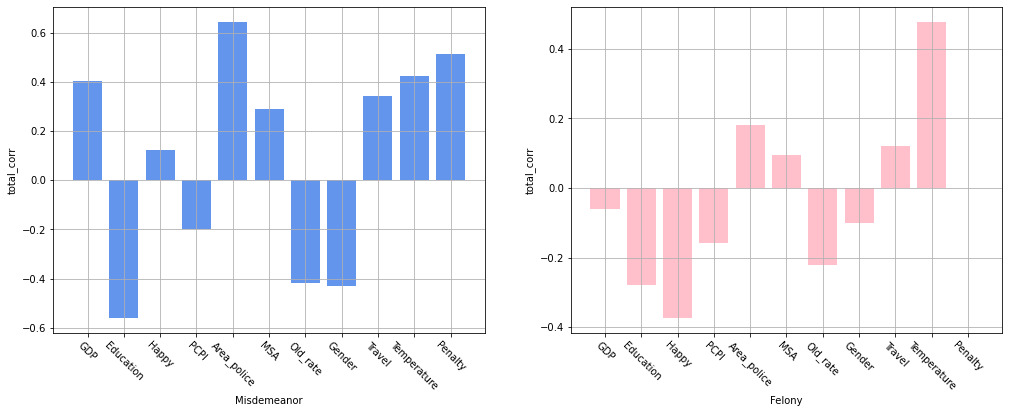

In [67]:
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
for i in range(len(List)):
    #if float(result_spear['p-value(Mis)'][i])<0.0:
    if result_spear.index[i]=='GDP' or result_spear.index[i]=="Happy":
        plt.bar(result_spear.index[i],float(result_spear['Misdemeanor'][i]),color='cornflowerblue')
    else:
        plt.bar(result_spear.index[i],float(result_spear['Misdemeanor'][i]),color='cornflowerblue')
        
        
plt.grid(True)
plt.xlabel('Misdemeanor')
plt.ylabel('total_corr')
plt.xticks(rotation = - 45)


plt.subplot(1,2,2)
for i in range(len(List)):
    #if float(result_spear['p-value(Fel)'][i])<0.00:
    if result_spear.index[i]=='GDP' or result_spear.index[i]=="Happy":
        plt.bar(result_spear.index[i],float(result_spear['Felony'][i]),color='pink')
    else:
        plt.bar(result_spear.index[i],float(result_spear['Felony'][i]),color='pink')
        
plt.grid(True)
plt.xlabel('Felony')
plt.ylabel('total_corr')
plt.xticks(rotation = - 45)
plt.show()